In [1]:
# Alex W
# 1003474

#%%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt(fname="HW1_data/4/kmeans-image.txt",
                  delimiter=" ",
                  dtype=int)


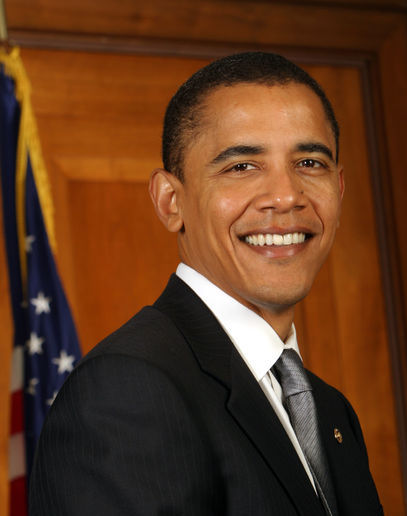

In [2]:
from PIL import Image


def display_image_from_data(data):
    image = Image.fromarray(data.reshape((516, 407, 3)).astype(np.uint8))
    return image


display_image_from_data(data)


In [3]:
def calculate_euclidean_distance(a, b):
    return np.linalg.norm(a - b)



In [4]:
def get_closest_centroid_index(sample, centroids):
    distance_closest = np.Infinity
    centroid_closest = -1
    for centroid_index, centroid in enumerate(centroids):
        distance_current = calculate_euclidean_distance(sample, centroid)
        if distance_current < distance_closest:
            distance_closest = distance_current
            centroid_closest = centroid_index

    return centroid_closest



100%|██████████| 8/8 [00:00<00:00, 11.47it/s]


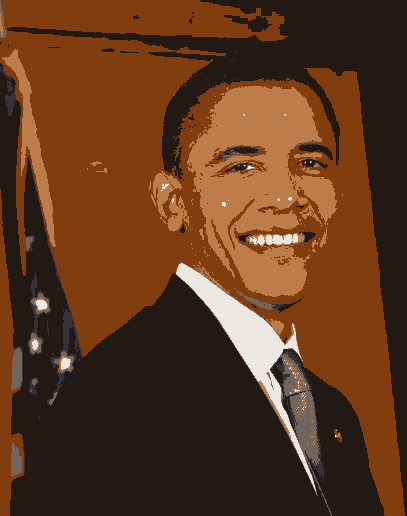

In [5]:

centroids = np.array([[255, 255, 255], [255, 0, 0], [128, 0, 0], [0, 255, 0],
                      [0, 128, 0], [0, 0, 255], [0, 0, 128], [0, 0, 0]])

# array of cluster assigned, by index of centroids
# initialised to -1
cluster_assigned = np.linspace(-1, -1, data.shape[0])

cluster_assigned_new = np.copy(cluster_assigned)
centroids_new = np.copy(centroids)

from tqdm import tqdm

iteration = -1
while True:
    iteration += 1
    print(f'iteration: {iteration}')

    # assign points by find best clusters given centroids
    for pixel_index, pixel in tqdm(enumerate(data), total=data.shape[0]):
        centroid_closest = get_closest_centroid_index(pixel, centroids)

        cluster_assigned_new[pixel_index] = centroid_closest

    # reassign centroids by find best centroids given clusters
    for centroid_index, centroid in tqdm(enumerate(centroids),
                                         total=centroids.shape[0]):
        samples = data[[
            sample_centroid_closest == centroid_index
            for sample_centroid_closest in cluster_assigned_new
        ]]

        if samples.any():
            # account for when the centroid contains no points
            # only reassign when contains points

            centroids_new[centroid_index] = np.mean(samples, axis=0)

    if np.array_equal(centroids, centroids_new) and np.array_equal(
            cluster_assigned, cluster_assigned_new):
        break

    centroids = centroids_new
    cluster_assigned = cluster_assigned_new

# reconstruct data image
data_new = np.array([
    centroids[int(sample_centroid_closest)]
    for sample_centroid_closest in cluster_assigned
])

display_image_from_data(data_new)
